In [1]:
import os
import time
import uuid
import cv2
import tensorflow as tf
import json
import numpy as np
from matplotlib import pyplot as plt

In [2]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [4]:
images=tf.data.Dataset.list_files('archive (1)/Train/Train/JPEGImages\\*.jpg')


In [5]:
def load_image(x): 
    byte_img = tf.io.read_file(x)
    img = tf.io.decode_jpeg(byte_img)
    return img

In [6]:
images = images.map(load_image)


In [7]:
images.as_numpy_iterator().next()

array([[[254, 254, 254],
        [254, 254, 254],
        [254, 254, 254],
        ...,
        [254, 254, 254],
        [254, 254, 254],
        [254, 254, 254]],

       [[254, 254, 254],
        [254, 254, 254],
        [254, 254, 254],
        ...,
        [254, 254, 254],
        [254, 254, 254],
        [254, 254, 254]],

       [[254, 254, 254],
        [254, 254, 254],
        [254, 254, 254],
        ...,
        [254, 254, 254],
        [254, 254, 254],
        [254, 254, 254]],

       ...,

       [[254, 254, 254],
        [254, 254, 254],
        [254, 254, 254],
        ...,
        [254, 254, 254],
        [254, 254, 254],
        [254, 254, 254]],

       [[254, 254, 254],
        [254, 254, 254],
        [254, 254, 254],
        ...,
        [254, 254, 254],
        [254, 254, 254],
        [254, 254, 254]],

       [[254, 254, 254],
        [254, 254, 254],
        [254, 254, 254],
        ...,
        [254, 254, 254],
        [254, 254, 254],
        [254, 254, 254]]

In [9]:
i_g = images.batch(1).as_numpy_iterator()

In [11]:
plot_images = i_g.next()

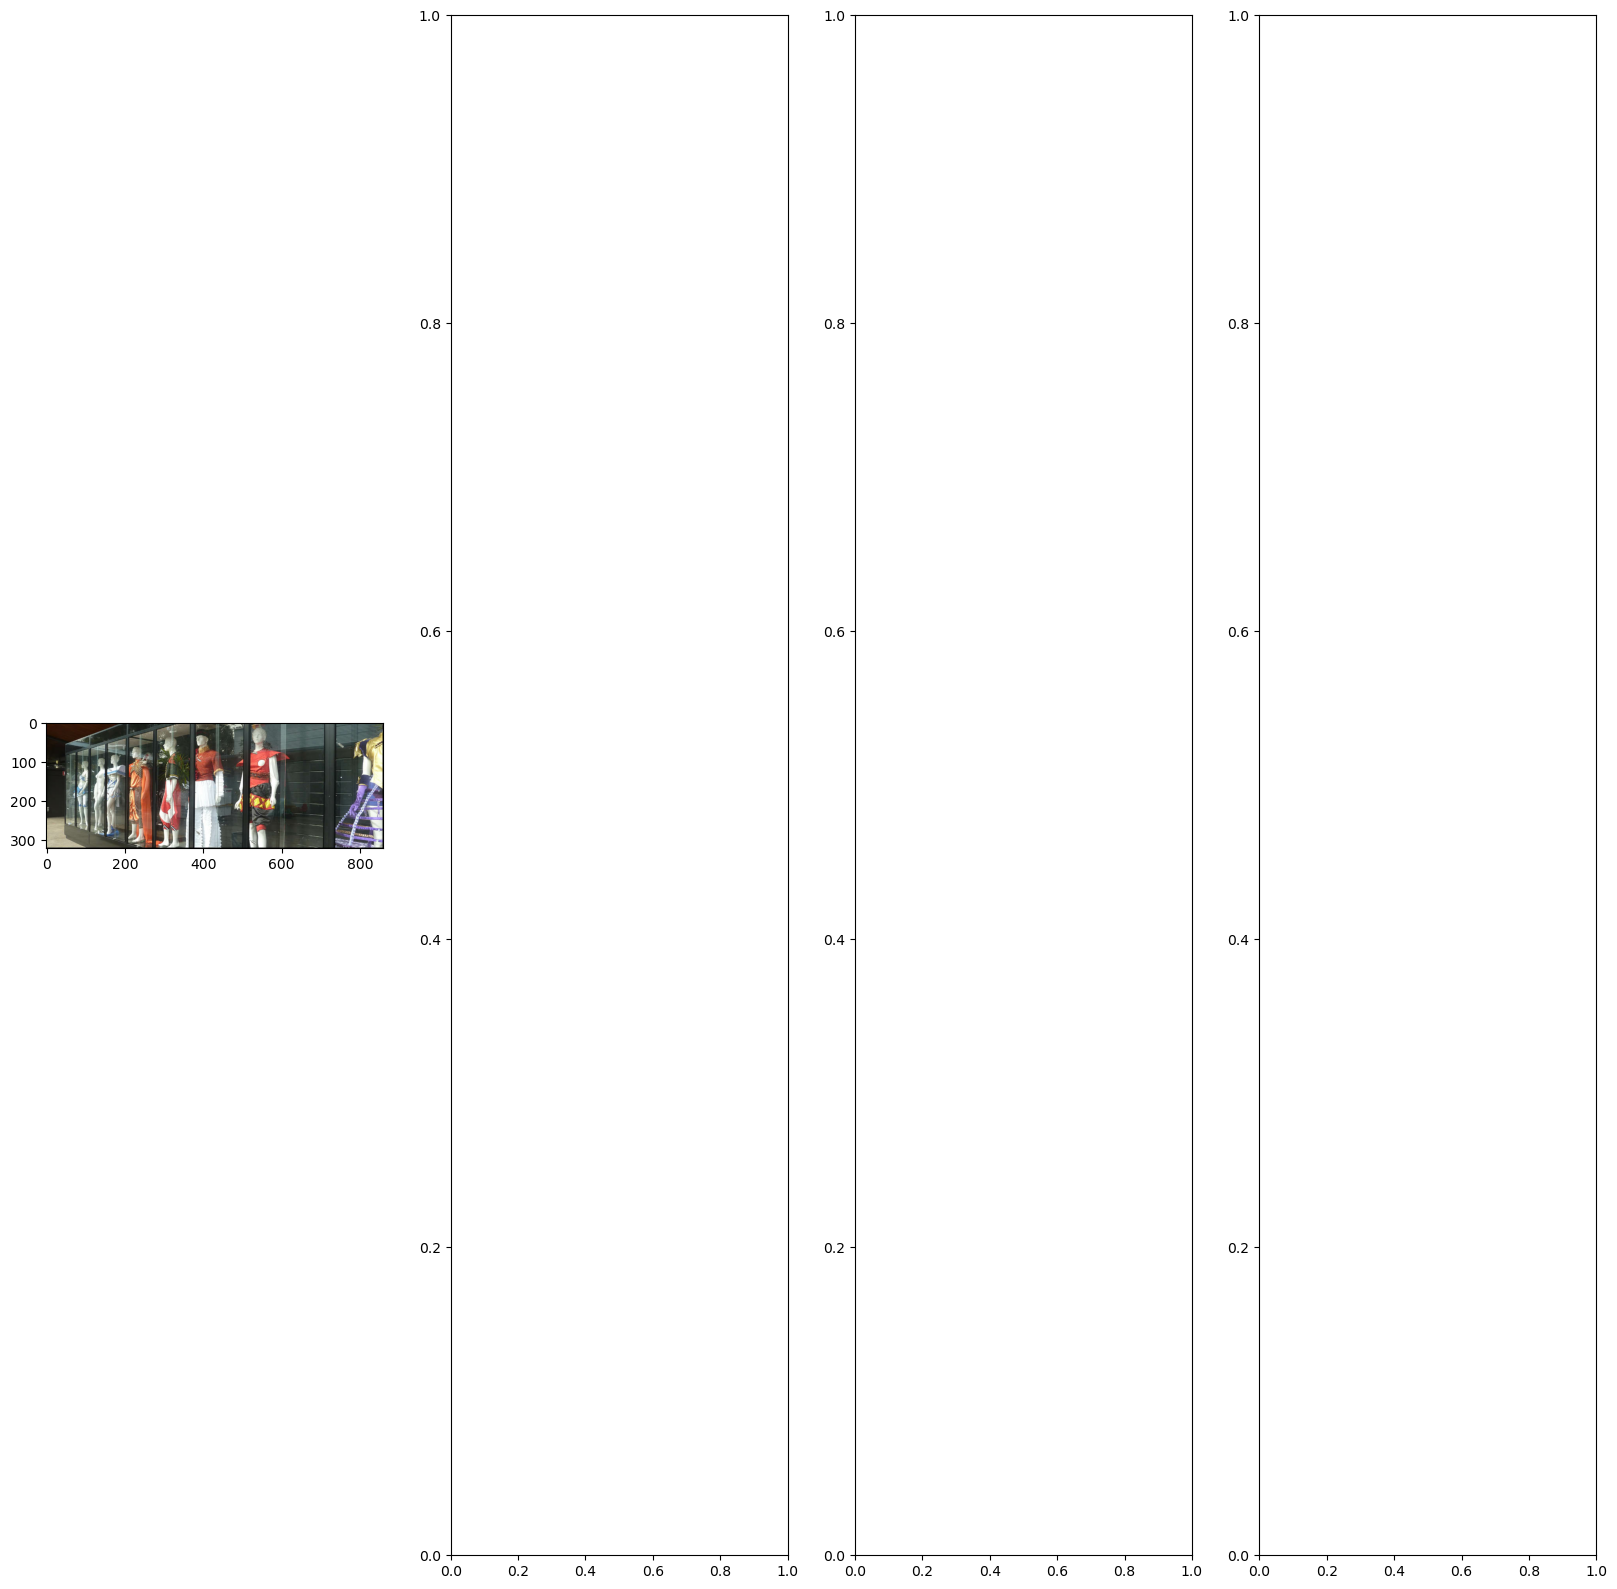

In [12]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, image in enumerate(plot_images):
    ax[idx].imshow(image) 
plt.show()

In [13]:
import albumentations as alb

In [14]:
aug = alb.Compose([
                         alb.HorizontalFlip(p=0.5), 
                         alb.RandomBrightnessContrast(p=0.2),
                         alb.RandomGamma(p=0.2), 
                         alb.RGBShift(p=0.2), 
                         alb.VerticalFlip(p=0.5)], 
                       bbox_params=alb.BboxParams(format='albumentations', 
                                                  label_fields=['class_labels']))

In [15]:
img = cv2.imread(os.path.join('archive (1)','train','train','JPEGImages','image (1).jpg'))

In [16]:
from xml.dom import minidom

In [17]:
file = minidom.parse('archive (1)\Train\Train\Annotations\image (1).xml')

In [18]:
coords = [0,0,0,0]
coords[0]=file.getElementsByTagName('xmin')[0].firstChild.nodeValue
coords[1]=file.getElementsByTagName('ymin')[0].firstChild.nodeValue
coords[2]=file.getElementsByTagName('xmax')[0].firstChild.nodeValue
coords[3]=file.getElementsByTagName('ymax')[0].firstChild.nodeValue

In [19]:
width=file.getElementsByTagName('width')[0].firstChild.nodeValue
height=file.getElementsByTagName('height')[0].firstChild.nodeValue
coords[0]=int(coords[0])/int(width)
coords[1]=int(coords[1])/int(height)
coords[2]=int(coords[2])/int(width)
coords[3]=int(coords[3])/int(height)

In [20]:
coords

[0.316, 0.09954751131221719, 0.578, 0.3778280542986425]

In [21]:
augmented = aug(image=img, bboxes=[coords], class_labels=['pedestrain'])

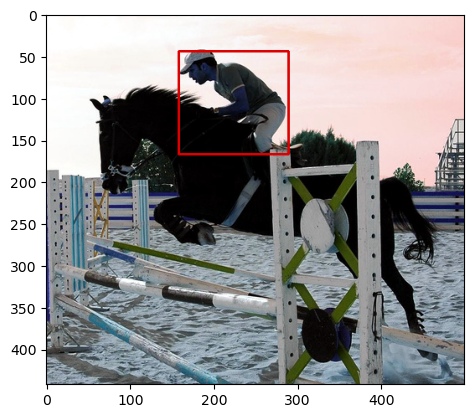

In [23]:
cv2.rectangle(augmented['image'], 
              tuple(np.multiply(augmented['bboxes'][0][:2], [500,442]).astype(int)),
              tuple(np.multiply(augmented['bboxes'][0][2:], [500,442]).astype(int)), 
                    (220,0,0), 2)

plt.imshow(augmented['image'])